In [1]:
!pip3 install numpy matplotlib ipympl


/Users/lukasbongartz/Desktop/Promotion/Python/.venv/bin/pip3: line 2: /Users/lukasbongartz/Desktop/JMCC Paper/Plots/.venv/bin/python3: No such file or directory
/Users/lukasbongartz/Desktop/Promotion/Python/.venv/bin/pip3: line 2: exec: /Users/lukasbongartz/Desktop/JMCC Paper/Plots/.venv/bin/python3: cannot execute: No such file or directory


In [2]:
### If using JupyterLab 2
#!pip install nodejs-bin
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
#!jupyter labextension install jupyter-matplotlib

In [3]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import gridspec
from matplotlib.widgets import Slider, Button
import numpy as np 


In [4]:
phi = np.arange(0,1.001,0.001)

T_init = 300

kB=1.380e-23
e=1.602e-19
h1_init=0
h2_init=0
h3_init=0

def H(h1, h2, h3):
    return kB*300*(h1*phi**2 + h2*(1-phi)**2 + h3*(1-phi)*phi)/e*1000

def S():
    return -kB*(phi*np.log(phi) + (1-phi)*np.log(1-phi))/e*1000

def ST(T):
    return -kB*(phi*np.log(phi) + (1-phi)*np.log(1-phi))*T/e*1000

def G(T, h1, h2, h3):
    return (H(h1, h2, h3)-T*S())

def G_2(T, h1, h2, h3):
    return (H(h1, h2, h3)-ST(T))

def mu(T, h1, h2, h3):
    return (np.diff(G(T, h1, h2, h3))/np.diff(phi))

/var/folders/d8/mb5sdbfn2615pgm5x91bt4rc0000gn/T/ipykernel_36517/1050630424.py:18: RuntimeWarning: divide by zero encountered in log
  return -kB*(phi*np.log(phi) + (1-phi)*np.log(1-phi))*T/e*1000
/var/folders/d8/mb5sdbfn2615pgm5x91bt4rc0000gn/T/ipykernel_36517/1050630424.py:18: RuntimeWarning: invalid value encountered in multiply
  return -kB*(phi*np.log(phi) + (1-phi)*np.log(1-phi))*T/e*1000
/var/folders/d8/mb5sdbfn2615pgm5x91bt4rc0000gn/T/ipykernel_36517/1050630424.py:15: RuntimeWarning: divide by zero encountered in log
  return -kB*(phi*np.log(phi) + (1-phi)*np.log(1-phi))/e*1000
/var/folders/d8/mb5sdbfn2615pgm5x91bt4rc0000gn/T/ipykernel_36517/1050630424.py:15: RuntimeWarning: invalid value encountered in multiply
  return -kB*(phi*np.log(phi) + (1-phi)*np.log(1-phi))/e*1000


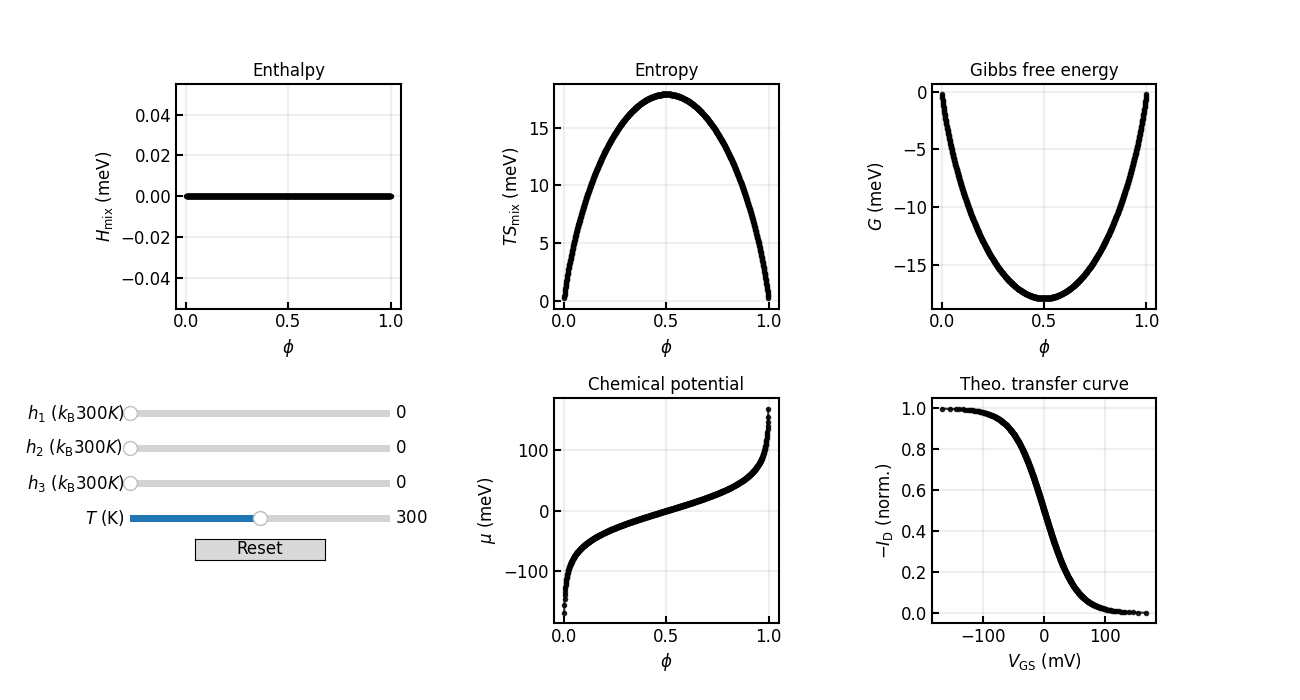

/var/folders/d8/mb5sdbfn2615pgm5x91bt4rc0000gn/T/ipykernel_36517/1050630424.py:18: RuntimeWarning: divide by zero encountered in log
  return -kB*(phi*np.log(phi) + (1-phi)*np.log(1-phi))*T/e*1000
/var/folders/d8/mb5sdbfn2615pgm5x91bt4rc0000gn/T/ipykernel_36517/1050630424.py:18: RuntimeWarning: invalid value encountered in multiply
  return -kB*(phi*np.log(phi) + (1-phi)*np.log(1-phi))*T/e*1000
/var/folders/d8/mb5sdbfn2615pgm5x91bt4rc0000gn/T/ipykernel_36517/1050630424.py:15: RuntimeWarning: divide by zero encountered in log
  return -kB*(phi*np.log(phi) + (1-phi)*np.log(1-phi))/e*1000
/var/folders/d8/mb5sdbfn2615pgm5x91bt4rc0000gn/T/ipykernel_36517/1050630424.py:15: RuntimeWarning: invalid value encountered in multiply
  return -kB*(phi*np.log(phi) + (1-phi)*np.log(1-phi))/e*1000
/var/folders/d8/mb5sdbfn2615pgm5x91bt4rc0000gn/T/ipykernel_36517/1050630424.py:18: RuntimeWarning: divide by zero encountered in log
  return -kB*(phi*np.log(phi) + (1-phi)*np.log(1-phi))*T/e*1000
/var/folder

In [ ]:
font = {'size' : 12} 
plt.rc('font', **font)
fig = plt.figure(figsize=[13, 7]); 

gs0 = gridspec.GridSpec(2, 1, figure = fig, hspace = 0.4)

gs00 = gs0[0].subgridspec(1,3, wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(gs00[0,0])
ax2 = fig.add_subplot(gs00[0,1])
ax3 = fig.add_subplot(gs00[0,2])

gs01 = gs0[1].subgridspec(1,3, wspace = 0.5, hspace = 0.5)

ax5 = fig.add_subplot(gs01[0,1])
ax6 = fig.add_subplot(gs01[0,2])

alpha = 0.8
lw = 1.5
ms = 3

cmap = plt.cm.coolwarm
line_colors = cmap(np.linspace(0,1,9))

def main():

    H_Plot, = ax1.plot(phi, H(h1_init, h2_init, h3_init), linestyle='-',linewidth=lw, marker='o', markersize=ms, color = 'k', alpha = alpha)
    ST_Plot, = ax2.plot(phi, ST(T_init), linestyle='-',linewidth=lw, marker='o', markersize=ms, color = 'k', alpha = alpha)

    G_Plot, = ax3.plot(phi, G_2(T_init, h1_init, h2_init, h3_init), linestyle='-',linewidth=lw, marker='o', markersize=ms, color = 'k', alpha = alpha)
    mu_Plot, = ax5.plot((phi[1:]+phi[:-1])/2, mu(T_init, h1_init, h2_init, h3_init), linestyle='-',linewidth=lw, marker='o', markersize=ms, color = 'k', alpha = alpha)
    Id_Plot, = ax6.plot(mu(T_init, h1_init, h2_init, h3_init), 1-(phi[1:]+phi[:-1])/2, linestyle='-',linewidth=lw, marker='o', markersize=ms, color = 'k', alpha = alpha)

    axh1 = plt.axes([0.1, 0.4, 0.2, 0.02])
    h1_slider = Slider(
    ax=axh1,
    label=r'$h_1$ ($k_\mathrm{B}{300K}$)',
    valmin=0,
    valmax=5,
    valinit=h1_init,
    )

    axh2 = plt.axes([0.1, 0.35, 0.2, 0.02])
    h2_slider = Slider(
    ax=axh2,
    label=r'$h_2$ ($k_\mathrm{B}{300K}$) ',
    valmin=0,
    valmax=5,
    valinit=h2_init,
    )

    axh3 = plt.axes([0.1, 0.3, 0.2, 0.02])
    h3_slider = Slider(
    ax=axh3,
    label=r'$h_3$ ($k_\mathrm{B}{300K}$)',
    valmin=0,
    valmax=5,
    valinit=h3_init,
    )

    axT = plt.axes([0.1, 0.25, 0.2, 0.02])
    T_slider = Slider(
    ax=axT,
    label='$T$ (K)',
    valmin=200,
    valmax=400,
    valinit=T_init,
    )

    def update(val):
        H_Plot.set_ydata(H(h1_slider.val, h2_slider.val, h3_slider.val))
        ST_Plot.set_ydata(ST(T_slider.val))
        G_Plot.set_ydata(G_2(T_slider.val, h1_slider.val, h2_slider.val, h3_slider.val))
        mu_Plot.set_ydata(mu(T_slider.val, h1_slider.val, h2_slider.val, h3_slider.val))
        Id_Plot.set_xdata(mu(T_slider.val, h1_slider.val, h2_slider.val, h3_slider.val))

        for axes in ax1, ax2, ax3, ax5, ax6:
            axes.relim()
            axes.autoscale_view()
            axes.set_aspect(1./axes.get_data_ratio())
        
        fig.canvas.draw_idle()
    T_slider.on_changed(update)
    h1_slider.on_changed(update)
    h2_slider.on_changed(update)
    h3_slider.on_changed(update)

    resetax = plt.axes([0.15, 0.2, 0.1, 0.03])
    button = Button(resetax, 'Reset', hovercolor='0.975')
    def reset(event):
        T_slider.reset()
        h1_slider.reset()
        h2_slider.reset()
        h3_slider.reset()
    button.on_clicked(reset)


    ax1.set_xlabel('$\phi$') 
    ax1.set_ylabel(r'$H_\mathrm{mix}$ (meV)')
    ax1.set_title(r'Enthalpy', fontsize=12)

    ax2.set_xlabel('$\phi$') 
    ax2.set_ylabel(r'$TS_\mathrm{mix}$ (meV)')
    ax2.set_title(r'Entropy', fontsize=12)

    ax3.set_xlabel('$\phi$') 
    ax3.set_ylabel('$G$ (meV)')
    ax3.set_title('Gibbs free energy', fontsize=12)

    ax5.set_xlabel('$\phi$'); 
    ax5.set_ylabel('$\mu$ (meV)'); 
    ax5.set_title('Chemical potential', fontsize=12)

    ax6.set_xlabel(r'$V_\mathrm{GS}$ (mV)'); 
    ax6.set_ylabel(r'$-I_\mathrm{D}$ (norm.)'); 
    ax6.set_title('Theo. transfer curve', fontsize=12)



    for ax in [ax1, ax2, ax3, ax5, ax6]:
        ax.set_aspect(1./ax.get_data_ratio())

        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(1.5)

        ax.tick_params(axis = 'both', width = 1.5, length = 5, grid_linewidth = 1.5, direction = 'in')
        ax.grid(True,'major',alpha=0.2)

    plt.show()
main()
